**Общая информация**

**Срок сдачи:** 21 октября 2019, 08:30 

**Штраф за опоздание:** по 0.5 балла за 24 часа задержки. Через 10 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0919, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Невыполнение PEP8 -0.5 баллов
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.spatial.distance import pdist, squareform, cdist

import sklearn
import seaborn as sns #графоний
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata, fetch_20newsgroups
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.dist_metrics import DistanceMetric
from sklearn.neighbors.kd_tree import KDTree 
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

In [38]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute', metric='euclidean'):
        self.n = n_neighbors
        self.alg=algorithm
        self.metric=metric
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        pass
    
    def brute_predict(self, X):
        x = np.asarray(X)
        ans = np.ones(X.shape[0])
        d = cdist(X, self.X, self.metric)
        a = self.y[np.argsort(d, axis = 1)[:, :self.n]]
        for i in range(X.shape[0]):
            u, indices = np.unique(a[i], return_counts=True)
            ans[i] = u[np.argmax(indices)]
        return ans.astype(int)
    
    def brute_predict_proba(self, X):
        d = cdist(X, self.X, self.metric)
        a = self.y[np.argsort(d, axis = 1)[:, :self.n]]
        x1, y1 = np.unique(self.y, return_inverse=True)
        ans = np.zeros((X.shape[0], x1.shape[0]))
        for i in range(X.shape[0]):
            tmp = np.append(a[i], x1, axis = 0)
            u, counts = np.unique(tmp, return_counts=True)
            counts = counts - 1
            counts = counts / counts.sum()
            ans[i] = counts
        return ans
    
    def kd_tree_predict_proba(self, X):
        a = sklearn.neighbors.KDTree(self.X)  
        a = a.query(X, k=self.n, return_distance=False, dualtree=False, breadth_first=False)
        a = self.y[a]
        x1, y1 = np.unique(self.y, return_inverse=True)
        ans = np.zeros((X.shape[0], x1.shape[0]))
        for i in range(X.shape[0]):
            tmp = np.append(a[i], x1, axis = 0)
            u, counts = np.unique(tmp, return_counts=True)
            counts = counts - 1
            counts = counts / counts.sum()
            ans[i] = counts
        return ans
    
    def kd_tree_predict(self, X):
        ans = np.ones(X.shape[0])
        a = sklearn.neighbors.KDTree(self.X)  
        a = a.query(X, k=self.n, return_distance=False, dualtree=False, breadth_first=False)
        a = self.y[a]
        for i in range(X.shape[0]):
            u, indices = np.unique(a[i], return_counts=True)
            ans[i] = u[np.argmax(indices)]
        return ans.astype(int)
    
    def predict(self, X):
        if self.alg=='brute':
            return self.brute_predict(X)
        if self.alg=='kd_tree':
            return self.kd_tree_predict(X)
            
    def predict_proba(self, X):
        if self.alg=='brute':
            return self.brute_predict_proba(X)
        if self.alg=='kd_tree':
            return self.kd_tree_predict_proba(X)
    
    def score(self, X, y):
        return np.average(self.predict(X) == y)

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
clf = KNeighborsClassifier(n_neighbors=20, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=20, algorithm='brute')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [4]:
clf.predict(X_train)

array([2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1,
       2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2,
       0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2,
       1, 1, 2])

In [5]:
my_clf.fit(X_train, y_train)
my_clf.predict(X_train)

array([2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1,
       2, 0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 2,
       1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2,
       2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2,
       0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2,
       1, 1, 2])

In [6]:
my_clf.predict(X_test)

array([1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2])

In [7]:
clf.predict(X_test)

array([1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2])

In [8]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy

In [9]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.07 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [10]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 27.4 µs


In [11]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 9.82 ms


array([1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2])

In [12]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.77 ms


array([1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2])

In [13]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.1 ms


array([[0.  , 0.85, 0.15],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.3 , 0.7 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [0.  , 1.  , 0.  ],
       [0.  , 0.5 , 0.5 ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.05, 0.95]])

In [14]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.5 ms


array([[0.  , 0.85, 0.15],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.3 , 0.7 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [0.  , 1.  , 0.  ],
       [0.  , 0.5 , 0.5 ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.05, 0.95]])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris.
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

In [15]:
clf = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=20, algorithm='kd_tree')
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [16]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.61 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [17]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.1 µs


In [18]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 8.79 ms


array([1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0])

In [19]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.2 ms


array([1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0])

In [20]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.05 ms


array([[0.  , 0.85, 0.15],
       [0.  , 0.1 , 0.9 ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.75, 0.25],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.85, 0.15],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ]])

In [21]:
%time my_clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.94 ms


array([[0.  , 0.85, 0.15],
       [0.  , 0.1 , 0.9 ],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.75, 0.25],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.1 , 0.9 ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.85, 0.15],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ]])

In [22]:
assert abs(my_clf.score(X_test, y_test) - clf.score(X_test,y_test))<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [23]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [24]:
data = newsgroups['data']
target = newsgroups['target']

Переведите во всех документах все буквы в нижний регистр и замените во всех документах символы, не
являющиеся буквами и цифрами, на пробелы. Далее разбейте текста по пробельным символам на токены(термы/слова). Удалите текста, содержащие только пробелы.

In [25]:
def make_correct(data, target):
    data_ans = []
    target_ans = []
    target_res = target
    for j, i in enumerate(data):
        i = i.lower()
        i = re.sub('[^0-9a-z]', ' ', i)
        i = i.split()
        if i:
            data_ans.append(i)
            target_ans.append(j)
        np.delete(target_res, target_ans)
    return data_ans, target_res
#make_correct(data)

In [61]:
data_tok, target_tok = make_correct(data, target)
# data_tok should be a list of lists of tokens for each line in data.

In [62]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower() , map(' '.join, data_tok))), "please make sure that you lowercase the data and drop spaced texts"

Преобразуйте датасет в разреженную матрицу scipy.sparse.csr_matrix, где значение x в позиции (i, j)
означает, что в документе i слово j встретилось x раз

In [27]:
def for_vect(data, target):
    data_ans = []
    target_ans = []
    target_res = target
    for j, i in enumerate(data):
        i = i.lower()
        i = re.sub('[^0-9a-z]', ' ', i)
        if i != '' and i.isspace()==False:
            data_ans.append(i)
            target_ans.append(j)
        np.delete(target_res, target_ans)
    return data_ans, target_res

In [53]:
vectorizer = CountVectorizer(min_df=4000)
data_vect, target_vect = for_vect(data, target)
vectorizer.fit(data_vect)
sp = vectorizer.transform(data_vect)
#tf = TfidfTransformer()
#sp = tf.transform(sp, target_vect)
sp = sp.todense()
sp = np.array(sp)
target_vect = np.array(target_vect)

In [46]:
sp.shape

(11004, 20)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [33]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=3, n_repeats=20)
split = rkf.split(sp)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальный score в среднем на валидации на 3 фолдах).
Постройте график зависимости среднего score от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [36]:
k_list = list()
for i in range(0, 10):
    my_clf_tmp = MyKNeighborsClassifier(n_neighbors=i+2, algorithm='brute')
    ans = 0
    cnt = 0
    #print('!!')
    for train_index, test_index in split:
        #print('!')
        my_clf_tmp.fit(sp[train_index], target_vect[train_index])
        ans=ans + my_clf_tmp.score(sp[test_index], target_vect[test_index])
        cnt=cnt + 1
        if cnt==3:
            break
    k_list.append(ans/cnt)
    print("k = {0}, score = {1}".format(i + 1, ans/cnt))
print(k_list)        
#и не ясно почему

k = 1, score = 0.05288985823336969
k = 2, score = 0.05234460196292257
k = 3, score = 0.052708106143220655
k = 4, score = 0.05461650308978553
k = 5, score = 0.050072700836059615
k = 6, score = 0.0499818247909851
k = 7, score = 0.050072700836059615
k = 8, score = 0.05470737913486005
k = 9, score = 0.050708833151581235
k = 10, score = 0.049890948745910574
[0.05288985823336969, 0.05234460196292257, 0.052708106143220655, 0.05461650308978553, 0.050072700836059615, 0.0499818247909851, 0.050072700836059615, 0.05470737913486005, 0.050708833151581235, 0.049890948745910574]


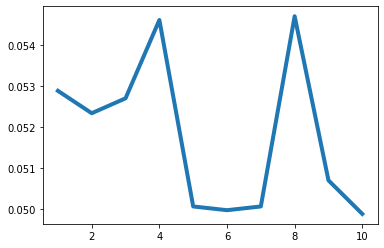

In [40]:
ax = plt.plot(range(1, 11), k_list, linewidth=4)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf преобразование( sklearn.feature_extraction.text.TfidfTransformer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [41]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим качество(score) вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [59]:
data = newsgroups['data']
target = newsgroups['target']
def make_correct(data, target):
    data_ans = []
    target_ans = []
    target_res = target
    for j, i in enumerate(data):
        i = i.lower()
        i = re.sub('[^0-9a-z]', ' ', i)
        i = i.split()
        if i:
            data_ans.append(i)
            target_ans.append(j)
        np.delete(target_res, target_ans)
    return data_ans, target_res
data_tok, target_tok = make_correct(data, target)
def for_vect(data, target):
    data_ans = []
    target_ans = []
    target_res = target
    for j, i in enumerate(data):
        i = i.lower()
        i = re.sub('[^0-9a-z]', ' ', i)
        if i != '' and i.isspace()==False:
            data_ans.append(i)
            target_ans.append(j)
        target_res = target[target_ans]
        #np.delete(target_res, target_ans)
    return data_ans, target_res
data_vect1, target_vect1 = for_vect(data, target)
sp1 = vectorizer.transform(data_vect1)
sp1 = sp1.todense()
sp1 = np.array(sp1)
target_vect1 = np.array(target_vect1)

In [60]:
my_clf_tmp = MyKNeighborsClassifier(n_neighbors=(np.argmax(rnd)+1),algorithm='brute')
my_clf_tmp.fit(sp, target_vect)
print(my_clf_tmp.score(sp1, target_vect1))

0.05404296073334246
